<a href="https://colab.research.google.com/github/iqierashid/SDG17-LinearRegression-Project/blob/main/Project_Linear_Regression_SDG15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

Perform linear regression analysis to explore the relationship between forest percentages and the trend over time

Importing Libraries and Data

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = '/content/sample_data/goal15.forest_shares.csv'
# Read the CSV file
dataset = pd.read_csv(file_path)

Data Info

In [ ]:
dataset.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         237 non-null    object 
 1   forests_2000  237 non-null    float64
 2   forests_2020  237 non-null    float64
 3   trend         227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


Top 10 countries with most forest coverage in 2020

In [ ]:
sorted_data = dataset.sort_values('forests_2020', ascending=False)

top_10_most = sorted_data.head(10)
sorted_data_trend = dataset.sort_values('trend', ascending=False)

top_10_gained = sorted_data_trend.head(10)

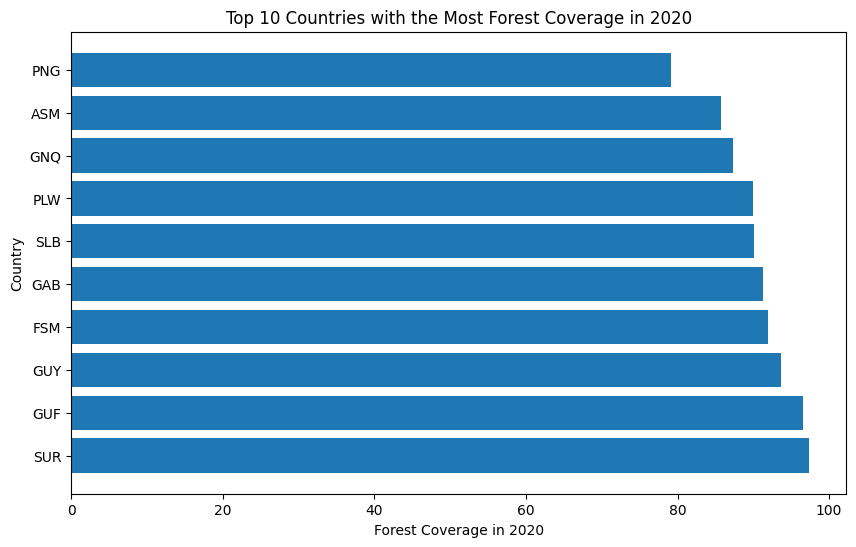

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_most['iso3c'], top_10_most['forests_2020'])
plt.xlabel('Forest Coverage in 2020')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Forest Coverage in 2020')


plt.show()

Top countries with largest gains in forest coverage

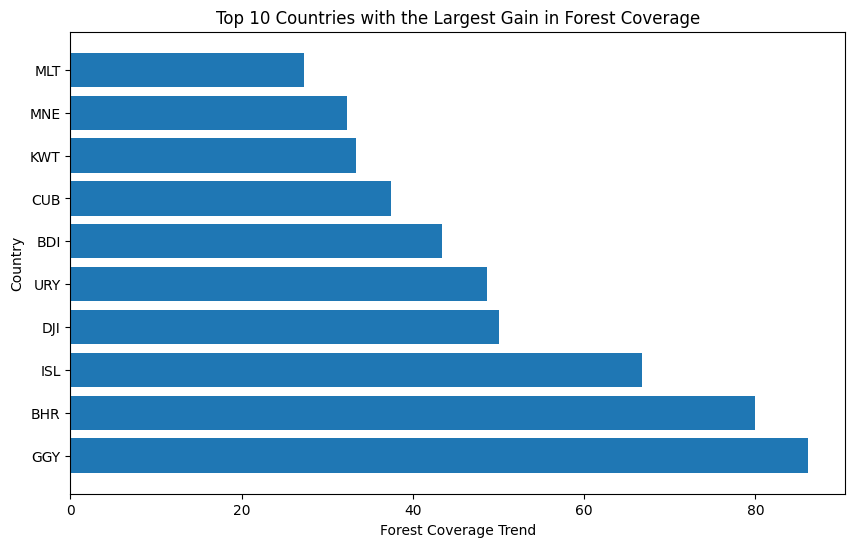

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_gained['iso3c'], top_10_gained['trend'])
plt.xlabel('Forest Coverage Trend')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Largest Gain in Forest Coverage')
plt.show()

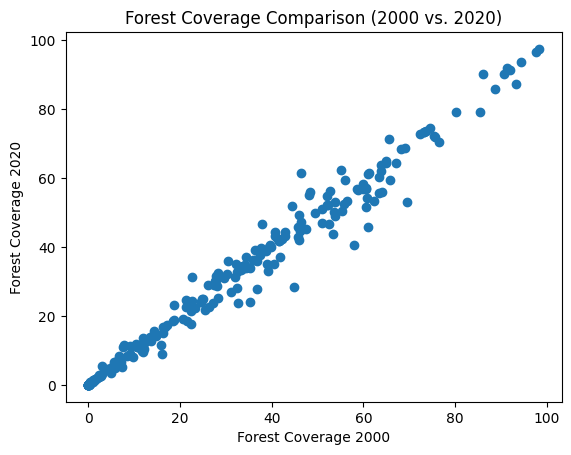

In [ ]:
plt.scatter(dataset['forests_2000'], dataset['forests_2020'])
plt.xlabel('Forest Coverage 2000')
plt.ylabel('Forest Coverage 2020')
plt.title('Forest Coverage Comparison (2000 vs. 2020)')
plt.show()

Comparison of Forest Coverage (2000 vs 2020)

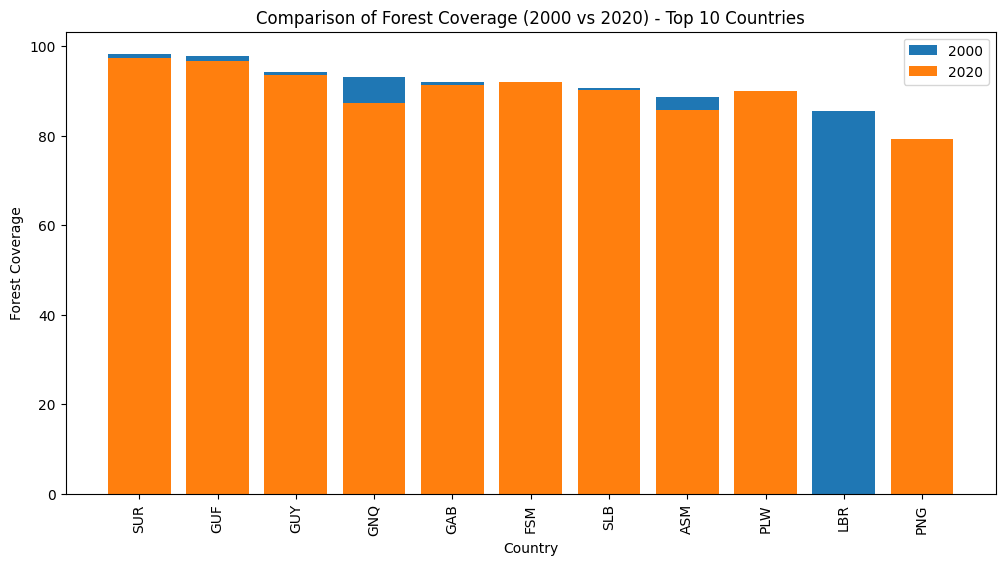

In [ ]:
top_10_countries_2000 = dataset.nlargest(10, 'forests_2000')
top_10_countries_2020 = dataset.nlargest(10, 'forests_2020')

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_2000['iso3c'], top_10_countries_2000['forests_2000'], label='2000')
plt.bar(top_10_countries_2020['iso3c'], top_10_countries_2020['forests_2020'], label='2020')
plt.xlabel('Country')
plt.ylabel('Forest Coverage')
plt.title('Comparison of Forest Coverage (2000 vs 2020) - Top 10 Countries')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Data Exploration

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target variable
features = ['forests_2000', 'forests_2020']
target = 'trend'

X = dataset[features]
y = dataset[target]


Training the model

In [ ]:
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X

,forests_2000,forests_2020
0,1.9,1.9
1,28.1,28.8
2,0.7,0.8
3,88.7,85.7
4,34.0,34.0
...,...,...
232,2.5,2.5
233,31.9,31.2
234,1.0,1.0
235,63.3,60.3


In [ ]:
len(y)

237

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

Results for Linear Regression:
Mean Squared Error: 55.558727810038796
R-squared Score: 0.6741237019520376


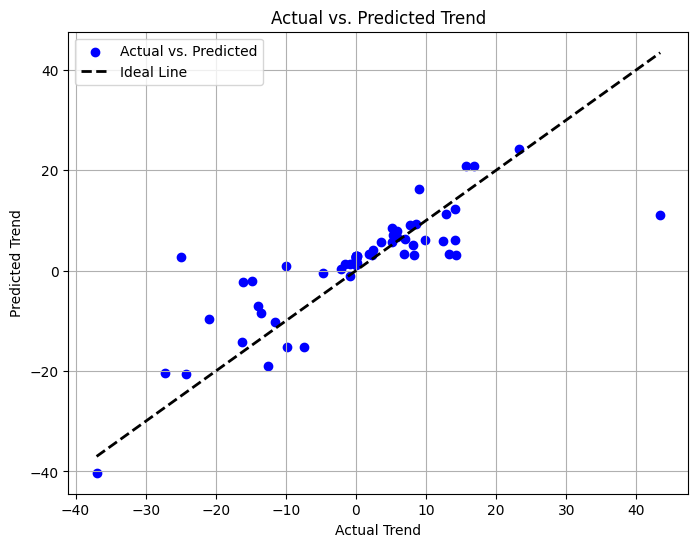

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Results for Linear Regression:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs. predicted results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')  # Plotting the diagonal line
plt.xlabel('Actual Trend')
plt.ylabel('Predicted Trend')
plt.title('Actual vs. Predicted Trend')
plt.legend()
plt.grid(True)
plt.show()